In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import os 
from collections import defaultdict
import numpy as np 

langs = ['de', 'en']
data_path = '../results/Meta-Llama-3-1-70B-Instruct-htzs'
model_types = ['custom', 'pretrained']

In [2]:
corrs = {}
for lang in langs:
    temp_data = []
    for model_type in model_types:
        sample_df = pd.read_csv(os.path.join(data_path, lang, model_type, f'inter_cluster_distances_{lang}.csv'))
        sample_df = sample_df.dropna()
        pivot = sample_df.pivot(index='cluster2', columns='cluster1', values='inter_distance').T
        temp_data.append(pivot)
    # measure the correlation between the two dataframes in temp_data
    corr = temp_data[0].corrwith(temp_data[1], axis=0)
    corrs[lang] = corr

<Axes: title={'center': 'Correlation between custom and pretrained models'}, xlabel='cluster2'>

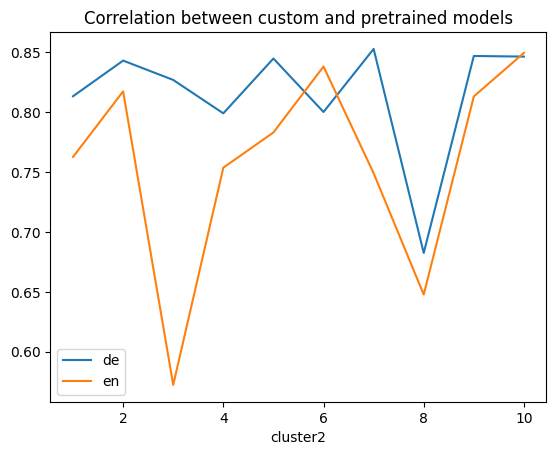

In [4]:
pd.DataFrame(corrs).plot(title='Correlation between custom and pretrained models')

In [5]:
# Load the reference data for 'en' and 'pretrained'
reference_df = pd.read_csv(os.path.join(data_path, 'en', 'pretrained', 'inter_cluster_distances_en.csv'))
reference_df = reference_df.dropna()
reference_pivot = reference_df.pivot(index='cluster2', columns='cluster1', values='inter_distance').T

# Initialize the dictionary to store correlations
corrs = {}

for lang in langs:
    temp_data = []
    for model_type in model_types:
        sample_df = pd.read_csv(os.path.join(data_path, lang, model_type, f'inter_cluster_distances_{lang}.csv'))
        sample_df = sample_df.dropna()
        pivot = sample_df.pivot(index='cluster2', columns='cluster1', values='inter_distance').T
        temp_data.append(pivot)

    # Measure the correlation between each dataframe in temp_data and the reference
    corr = [df.corrwith(reference_pivot, axis=0) for df in temp_data]
    corrs[lang] = corr

In [7]:
pd.DataFrame(corrs['de'])

cluster2,1,2,3,4,5,6,7,8,9,10
0,0.823821,0.834298,0.863318,0.807522,0.867515,0.855386,0.908034,0.719872,0.900921,0.833524
1,0.980655,0.992605,0.979697,0.976868,0.978256,0.974707,0.981375,0.975164,0.986118,0.996828


In [8]:
pd.DataFrame(corrs['en'])

cluster2,1,2,3,4,5,6,7,8,9,10
0,0.762728,0.817514,0.572225,0.753762,0.783172,0.838281,0.749139,0.647729,0.813302,0.849664
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
